<a href="https://colab.research.google.com/github/crgrant-droid/325-Project/blob/main/Aero1_23_tail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aerosandbox[full]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.4/707.4 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 8.0 MB/s eta 0:00:00


In [ ]:
import aerosandbox as asb
import aerosandbox.numpy as np
import matplotlib.pyplot as plt

In [ ]:
opti = asb.Opti()

x = opti.variable(init_guess=0)
y = opti.variable(init_guess=0)

z = (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
opti.minimize(z)

sol = opti.solve()
print(sol(x))
print(sol(y))
print(sol(z))

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 0.00e+00 2.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

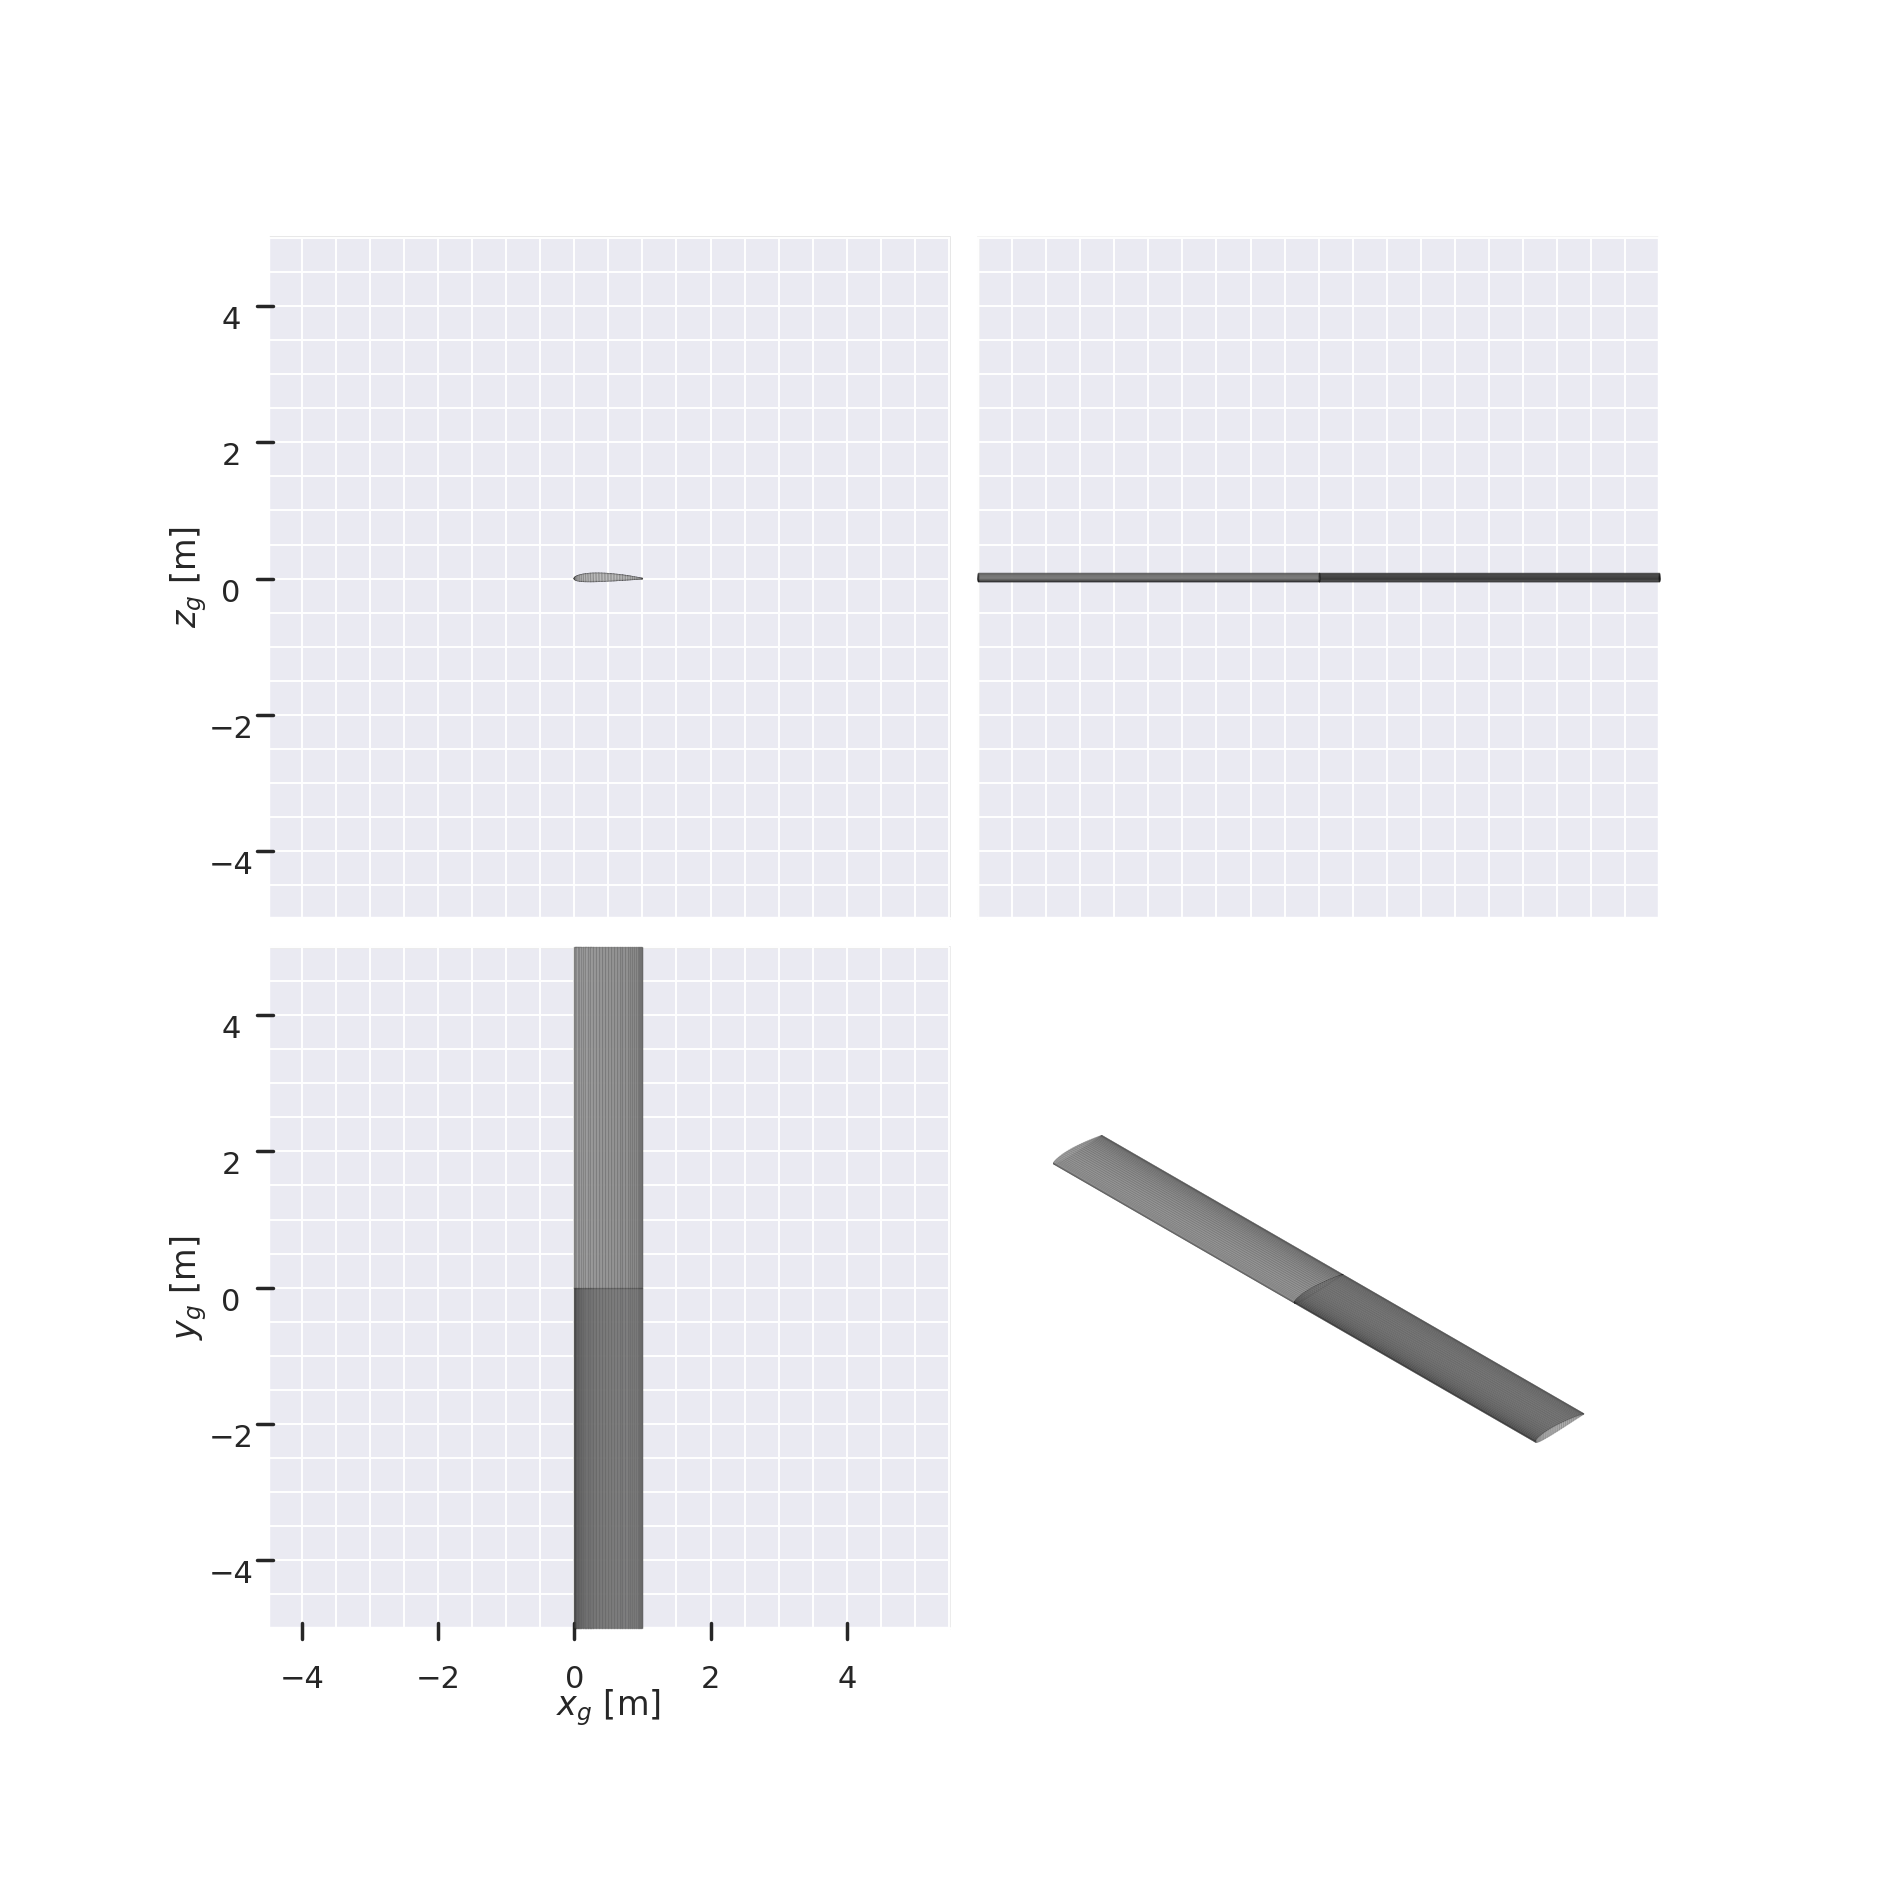

0.6010723719840506
10.0


In [ ]:
myairplane = asb.Airplane(
    name="airplane",
    xyz_ref=[0, 0, 0],
    wings=[
        asb.Wing(
            name="Wing",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=1,
                    airfoil=asb.Airfoil("naca2412"),
                ),
                asb.WingXSec(
                    xyz_le=[0, 5, 0],
                    chord=1,
                    airfoil=asb.Airfoil("naca2412"),
                )
            ]
        )
    ]
)
myairplane.draw_three_view()

vlm = asb.VortexLatticeMethod(
    airplane=myairplane,
    op_point=asb.OperatingPoint(
        velocity=13,
        alpha=5,
    ),
)
vlm_results = vlm.run()

print(vlm_results["CL"])

print(myairplane.s_ref)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:       20
Number of nonzeros in inequality constraint Jacobian.:       14
Number of nonzeros in Lagrangian Hessian.............:       36

Total number of variables............................:        8
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        3
Total number of inequality constraints...............:       10
        inequality constraints with only lower bounds:        3
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        7

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.6548188e-02 4.21e-01 5.18e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

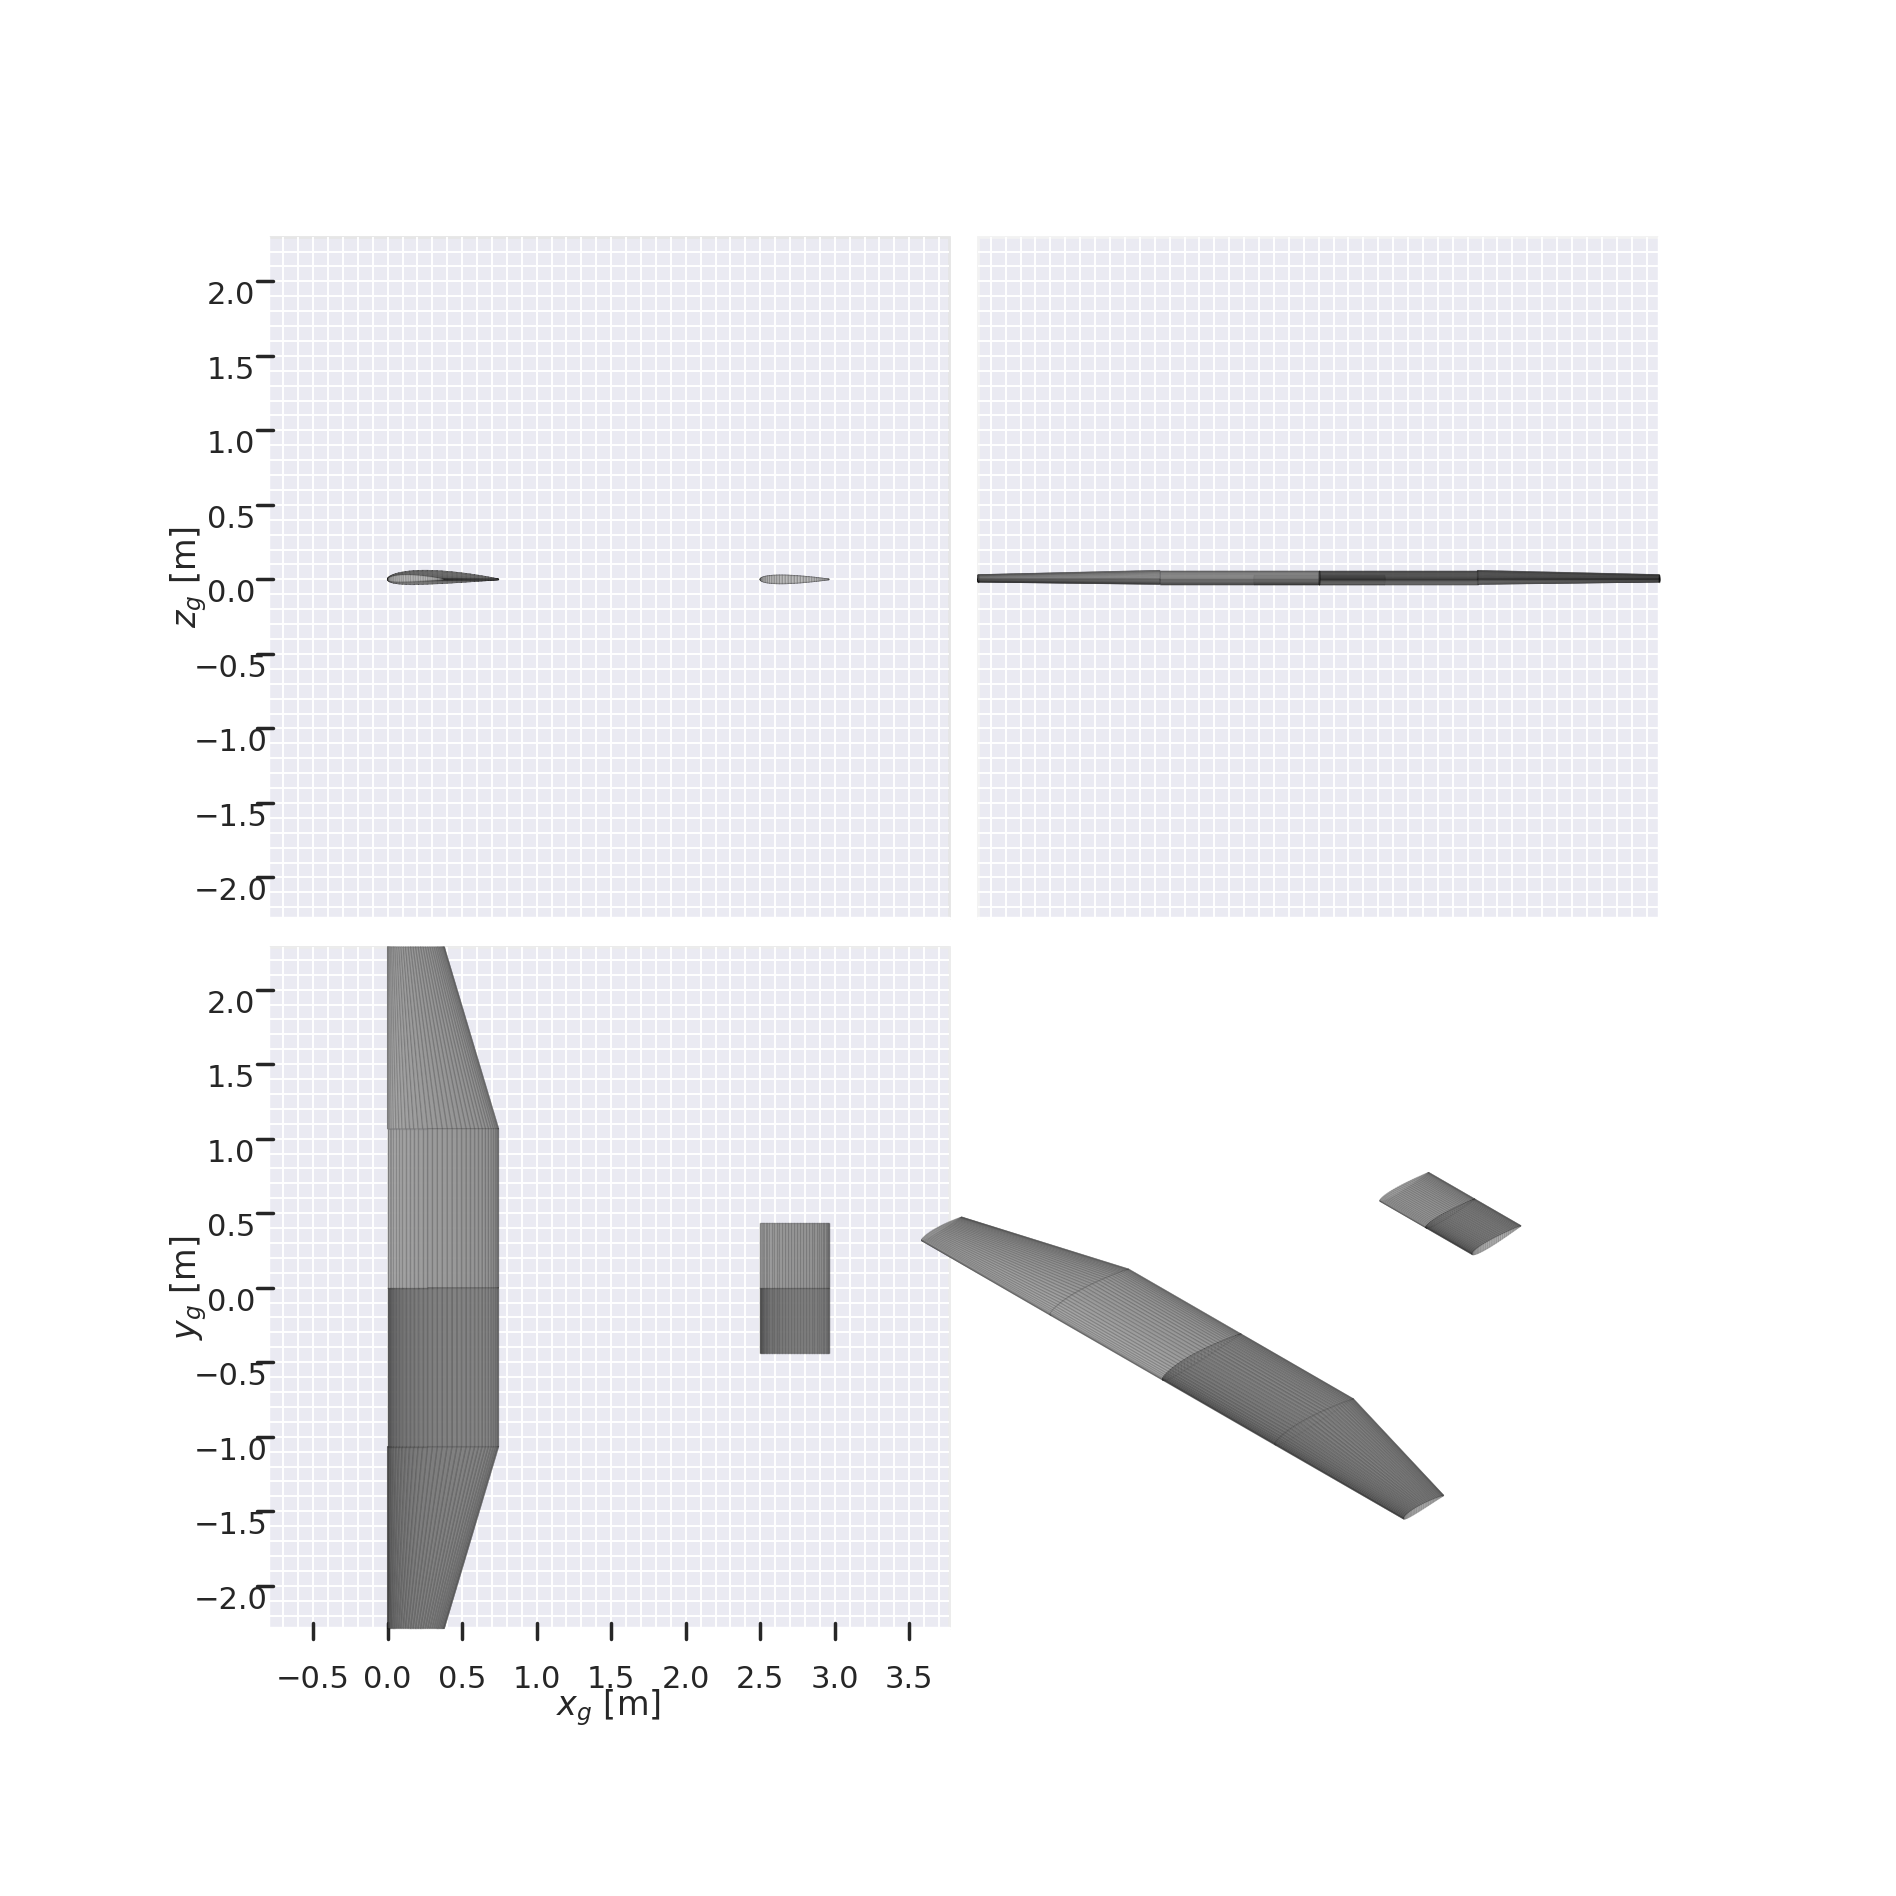

Root Chord: 0.7432969547509531 m
Tip Chord: 0.37909680061976786 m
Mid Chord: 0.7432952172245912 m
l: 2.1336005398678197 m
b: 4.572000043603484 m
Alpha: 4.098104444184497 deg
Taper Ratio: 0.5100206562083749


In [ ]:
opti2 = asb.Opti()


rootChord = opti2.variable(init_guess=1)
tipChord = opti2.variable(init_guess=1, lower_bound=0)
midChord = opti2.variable(init_guess=1)
tailChord = opti2.variable(init_guess=0.5, upper_bound=0.8)
b = opti2.variable(init_guess=3, upper_bound=4.572)
l = opti2.variable(init_guess=0.5, upper_bound=2.4384)
t = opti2.variable(init_guess=0.1, upper_bound=2.4384)

#wingAreaDensity = 6
#wingSparDensity = 0.5

myairplane = asb.Airplane(
    name="airplane",
    xyz_ref=[0, 0, 0],
    wings=[
        asb.Wing(
            name="Wing",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=rootChord,
                    airfoil=asb.Airfoil("naca2412"),
                ),
                asb.WingXSec(
                    xyz_le=[0, l/2, 0],
                    chord=midChord,
                    airfoil=asb.Airfoil("naca2412"),
                ),
                asb.WingXSec(
                    xyz_le=[0, b/2, 0],
                    chord=tipChord,
                    airfoil=asb.Airfoil("naca2412"),
                ),
            ]
        ),
        asb.Wing(
            name="Horizontal Tail",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[2.5, 0, 0],
                    chord=tailChord,
                    airfoil=asb.Airfoil("naca0012"),
                ),
                asb.WingXSec(
                    xyz_le=[2.5, t , 0],  # Example coordinates, adjust as needed
                    chord=tailChord,  # You can use any chord variable here
                    airfoil=asb.Airfoil("naca0012"),
                ),

            ]
       )
    ]
)

alpha = opti2.variable(init_guess=5)

vlm = asb.VortexLatticeMethod(
    airplane=myairplane,
    op_point=asb.OperatingPoint(
        velocity=13,
        alpha=alpha,
    ),
)

vlm_results = vlm.run()

#weight = myairplane.s_ref * wingAreaDensity + b * wingSparDensity

cht = ((myairplane.wings[1].aerodynamic_center(chord_fraction=0.25)[0] - myairplane.wings[0].aerodynamic_center(chord_fraction=0.25)[0]) * myairplane.wings[1].area(type='planform', include_centerline_distance=False)) / (myairplane.wings[0].mean_aerodynamic_chord()[0] * myairplane.wings[0].area(type='planform', include_centerline_distance=False))

opti2.subject_to([
    cht == 0.5,
    0 <= (b/2 - l/2),
    (b/2 -l/2) <= 1.2192,
    myairplane.s_ref == 2.954317,
    vlm_results["CL"] == 0.5,
    tipChord > 0,
    midChord > tipChord,
    rootChord > midChord,
   # weight <= 2,
])

opti2.minimize(vlm_results["CD"])

sol2 = opti2.solve(behavior_on_failure='return_last', max_iter=50)

sol2(myairplane).draw_three_view()
print(f"Root Chord: {sol2(rootChord)} m")
print(f"Tip Chord: {sol2(tipChord)} m")
print(f"Mid Chord: {sol2(midChord)} m")
print(f"l: {sol2(l)} m")
print(f"b: {sol2(b)} m")
print(f"Alpha: {sol2(alpha)} deg")
print(f"Taper Ratio: {sol2(tipChord)/sol2(rootChord)}")